# **Capstone Modul 2 : Analisis Data Super Market "FANCY" Berdasarkan Segementasi Customer Menggunakan *RFM* Analisis**

### **oleh : Stefanus William Alexander**

## **Latar Belakang**

**Super market "FANCY"** adalah sebuah toko yang menjual bahan-bahan makanan dan minuman mewah yang barangnya terdiri dari wine, buah, daging, manisan, ikan dan emas *edible* sebagai hiasan. Selain toko offline, Fancy juga memiliki toko online yang berguna untuk menjangkau customer lebih luas dan menambah fleksibilitas bisnis. Disini saya sebagai data analyst diminta untuk membantu memberi keputusan strategis untuk mempertahankan dan meninggkatkan kepuasan pelanggan dari data customer yang diberikan dan juga menyusun strategi pemasaran. Pada data ini untuk memahami perilaku pelanggan saya menggunakan RFM analisis yaitu sebuah metode data yang digunakan untuk mengelompokkan customer berdasarkan tiga faktor yaitu ***Recency***, ***Frequency*** dan ***Monetary***.

---

## **Rumusan Masalah**

Berdasarkan latar belakang diatas, maka dapat dirumuskan rumusan masalah sebagai berikut:
1. Bagaimana pembagian segemen customer setelah implementasi menggunakan metode RFM  analisis?
2. Bagaimana cara mempertahankan dan meningkatkan kepuasan customer dari masing-masing segmen?
3. Bagaimana cara meningkatkan penjualan produk?


---

## **Data**

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', None)
pd.set_option("display.max_seq_item" , None)


In [133]:
df = pd.read_csv("Supermarket Customers.csv", sep="\t")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0


Berikut 5 sample dari dataset Supermarket Customers.

In [134]:
df.sample(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1665,6437,1985,2n Cycle,Single,41473.0,1,0,19-06-2013,80,21,8,20,15,3,9,1,2,0,3,7,0,0,0,0,0,0,3,11,0
564,10232,1963,PhD,Divorced,48799.0,0,1,05-11-2013,9,174,18,81,28,6,24,3,3,2,7,3,0,0,0,0,0,0,3,11,0
1090,1127,1973,PhD,Married,85844.0,0,0,29-05-2014,62,938,19,843,25,95,38,1,6,6,7,2,0,0,1,0,0,0,3,11,0
94,2230,1970,PhD,Married,23626.0,1,0,24-05-2014,84,27,2,14,0,0,0,3,3,1,3,5,0,0,0,0,0,0,3,11,0
65,8082,1971,Graduation,Married,25721.0,1,0,21-05-2013,75,1,3,6,3,6,15,1,1,1,2,7,0,0,0,0,0,0,3,11,1


### **Data Understanding and Cleaning**

Ditahap ini perlu melakukan *data understanding* terlebih dahulu untuk memahami data yang dibutuhkan dalam memecahkan rumusan masalah. Nantinya akan terlihat  anomali-anomali apa saja yang terdapat di dalam dataset dan perlu ditangani dalam tahapan *data cleaning*. Setiap penanganan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

In [135]:
#check kolom
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

| No. | Nama Kolom  | Deskripsi |
| - | - | - |
| 1   | ID  | Pengenal Customer di Sistem (Unique)|
| 2   | Year_Birth  |  Tahun Lahir Customer |
| 3   | Education | Tingkat Pendidikan Customer  |
| 4   | Marital_Status  | Status Perkawinan Customer    |
| 5   | Income  | Pendapatan Rumah Tangga Tahunan Customer  |
| 6   | Kidhome | Jumlah Anak di Rumah Customer |
| 7   | Teenhome    | Jumlah Remaja di Rumah Customer |
| 8   | Dt_Customer | Tanggal Customer Mendaftar    |
| 9   | Recency | Jumlah Hari Sejak Pembelian Terakhir Customer |
| 10  | MntWines    | Jumlah Yang Dibelanjakan Untuk Wine Dalam 2 Tahun Terakhir  |
| 11  | MntFruits   | Jumlah Yang Dibelanjakan Untuk Buah Dalam 2 Tahun Terakhir  |
| 12  | MntMeatProducts | Jumlah Yang Dibelanjakan Untuk Daging Dalam 2 Tahun Terakhir  |
| 13  | MntFishProducts | Jumlah Yang Dibelanjakan Untuk Ikan Dalam 2 Tahun Terakhir  |
| 14  | MntSweetProducts    | Jumlah Yang Dibelanjakan Untuk Manisan Dalam 2 Tahun Terakhir  |
| 15  | MntGoldProds    | Jumlah Yang Dibelanjakan Untuk Emas Edible Dalam 2 Tahun Terakhir  |
| 16  | NumDealsPurchases   | Jumlah Pembelian yang Dilakukan Dengan Diskon |
| 17  | NumWebPurchases |  Jumlah Pembelian yang Dilakukan Melalui Situs Web |
| 18  | NumCatalogPurchases | Jumlah Pembelian yang Dilakukan Menggunakan Katalog |
| 19  | NumStorePurchases   | Jumlah Pembelian yang Dilakukan Langsung di Toko  |
| 20  | NumWebVisitsMonth   | Jumlah Kunjungan ke Situs Web Dalam Sebulan Terakhir   |
| 21  | AcceptedCmp1    | 1: Jika Customer Menerima Tawaran di Kampanye ke-1,<br>0: Sebaliknya   |
| 22  | AcceptedCmp2    | 1: Jika Customer Menerima Tawaran di Kampanye ke-2,<br>0: Sebaliknya   |
| 23  | AcceptedCmp3    | 1: Jika Customer Menerima Tawaran di Kampanye ke-3,<br>0: Sebaliknya   |
| 24  | AcceptedCmp4    | 1: Jika Customer Menerima Tawaran di Kampanye ke-4,<br>0: Sebaliknya   |
| 25  | AcceptedCmp5    | 1: Jika Customer Menerima Tawaran di Kampanye ke-5,<br>0: Sebaliknya   |
| 26  | Complain    | 1: Jika Customer Mengeluh Dalam 2 Tahun Terakhir <br>0: Sebaliknya  |
| 27  | Response    | 1: Jika Customer Menerima Tawaran di Kampanye terakhir,<br>0: Sebaliknya   |

In [136]:
#membuat df untuk mengecheck info tabel
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df_check = {"Kolom" : df.columns ,
            "Tipe data" : (df[i].dtype for i in df.columns),
            "Jumlah Data Kosong" : (df[i].isna().sum() for i in df.columns),
            "Jumlah Data Unik" : (df[i].nunique() for i in df.columns),
            "Data Unik" : (df[i].unique() for i in df.columns)}
df_check = pd.DataFrame(df_check)
df_check

Jumlah baris dan kolom di dataset df adalah (2240, 29)


,Kolom,Tipe data,Jumlah Data Kosong,Jumlah Data Unik,Data Unik
0,ID,int64,0,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Year_Birth,int64,0,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,Education,object,0,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,object,0,8,"[Single, Together, Married, Divorced, Widow, A..."
4,Income,float64,24,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Kidhome,int64,0,3,"[0, 1, 2]"
6,Teenhome,int64,0,3,"[0, 1, 2]"
7,Dt_Customer,object,0,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-201..."
8,Recency,int64,0,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,MntWines,int64,0,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


In [137]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


---

## **Data Cleaning**

Dilihat dari beberapa tabel diatas ada beberapa hal yang perlu diperbaiki yaitu : 

1. Ada kesalahan data type pada kolom `Dt_Customer` yang sebelumnya ***object*** ke ***datetime64[ns]***.

In [138]:
#merubah format tanggal
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"], format="%d-%m-%Y")
df["Dt_Customer"]

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

2. Ada kolom `Z_CostContact` dan `Z_Revenue` yang tidak diperlukan maka perlu dihapus karena tidak memberikan informasi apapun yang bisa dilihat dari nunique yang hanya memiliki 1 nilai.

In [139]:
#menghapus kolom
df = df.drop(columns=["Z_CostContact","Z_Revenue"])
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response'],
      dtype='object')

3. Menyatukan `Kidhome` dan `Teenhome` ke satu kolom dengan nama `Dependents`

In [140]:
#menggabungkan kolom
df.insert(loc=5,column="Dependents",value=(df["Kidhome"] + df["Teenhome"]))
df

,ID,Year_Birth,Education,Marital_Status,Income,Dependents,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,2,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,1,0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,3,2,1,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,1,0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [141]:
#drop kolom kidhome dan teen home
df = df.drop(columns=["Kidhome","Teenhome"])
df

,ID,Year_Birth,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,1946,PhD,Together,64014.0,3,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,1981,Graduation,Divorced,56981.0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,1956,Master,Together,69245.0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


4. Ada informasi yang bias pada kolom `Education` yaitu **"2n Cycle"** karena artinya sama dengan tingkat **"Master"** dan perlu juga merubah istilah tingkat edukasi lainya agar lebih mudah untuk dipahami.
    - **"Graduation"** menjadi **"Bachelor"**
    - **"PhD"** menjadi **"Doctoral"**

In [142]:
#check jumlah value
df["Education"].value_counts()

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

In [143]:
#Merubah nama value
df["Education"] = df["Education"].map({"Graduation" : "Bachelor",
                                       "PhD" : "Doctoral",
                                       "Master":"Master",
                                       "2n Cycle" : "Master",
                                       "Basic" : "Basic"
                                       })

In [144]:
#check jumlah value
df["Education"].value_counts()

Education
Bachelor    1127
Master       573
Doctoral     486
Basic         54
Name: count, dtype: int64

5. Ada informasi yang bias pada kolom `Marital_Status` yaitu **"Alone"**, **"Absurd"** dan **"YOLO"** karena jumlah datanya hanya sedikit maka bisa dihapus.

In [145]:
#check jumlah value
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [146]:
#check persentase
print(f"Alone = {round(len(df[df["Marital_Status"] == "Alone"])/df.shape[0]*100,2)}%\nAbsurd= {round(len(df[df["Marital_Status"] == "Absurd"])/df.shape[0]*100,2)}%\nYOLO = {round(len(df[df["Marital_Status"] == "YOLO"])/df.shape[0]*100,2)}%")

Alone = 0.13%
Absurd= 0.09%
YOLO = 0.09%


In [147]:
#menghapus value Alone, Absurd dan YOLO menggunakan query
df = df.query("Marital_Status not in ('Alone', 'Absurd', 'YOLO')")
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: count, dtype: int64

6. Untuk mempermudah analisis maka kolom `Year_Birth` bisa kita ganti menjadi kolom umur dengan nama kolom `Age` dengan patokan tahun kita ambil dari tahun orang terakhir mendaftar.

In [148]:
#melihat tahun tertinggi menjadi acuan
df["Dt_Customer"].max().year

2014

In [149]:
#merubah kolom Year_Birth menjadi Age
df.insert(loc=1,column="Age",value=(df["Dt_Customer"].max().year - df["Year_Birth"]))
df

,ID,Age,Year_Birth,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,57,1957,Bachelor,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,1954,Bachelor,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,1965,Bachelor,Together,71613.0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,1984,Bachelor,Together,26646.0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,1981,Doctoral,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,1967,Bachelor,Married,61223.0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,68,1946,Doctoral,Together,64014.0,3,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,33,1981,Bachelor,Divorced,56981.0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,58,1956,Master,Together,69245.0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [150]:
#drop kolom
df = df.drop(columns="Year_Birth")
df

,ID,Age,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,57,Bachelor,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,Bachelor,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,Bachelor,Together,71613.0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,Bachelor,Together,26646.0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,Doctoral,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Bachelor,Married,61223.0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,68,Doctoral,Together,64014.0,3,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,33,Bachelor,Divorced,56981.0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,58,Master,Together,69245.0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


7. Setelah merubah kolom `Year_Birth` menjadi kolom `Age`, diperoleh 3 customer yang memiliki umur diatas 100, karena dirasa tidak aneh dan mungkin adanya kesalahan pada saat pengisiian data makan data tersebut bisa dihapus.

In [151]:
#menghapus value age diatas umur 100
df = df[df["Age"]<100]
df["Age"].sort_values()

1170    18
46      18
995     19
747     19
1850    19
        ..
1150    71
2084    71
1923    71
424     73
1950    74
Name: Age, Length: 2230, dtype: int64

8. Untuk mempermudah analisis karena kolom `Response` merupakan kolom untuk menjelaskan bahwa customer menerima kampanye terkahir, untuk menyamakan dengan nama kolom lainnya maka bisa kita ubah nama kolomnya menjadi `AcceptedCmp6`.

In [152]:
#merubah nama kolom
df = df.rename(columns={"Response" : "AcceptedCmp6"})
df

,ID,Age,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
0,5524,57,Bachelor,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,Bachelor,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,Bachelor,Together,71613.0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,Bachelor,Together,26646.0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,Doctoral,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,47,Bachelor,Married,61223.0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2236,4001,68,Doctoral,Together,64014.0,3,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0
2237,7270,33,Bachelor,Divorced,56981.0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,58,Master,Together,69245.0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


9. Pada kolom `Income` memiliki angka 666666 karena tampak aneh, maka data tersebut bisa kita hapus.

In [153]:
#menghapus value 666666 pada income
df = df[df["Income"]!= 666666]
df["Income"].sort_values()

1245    1730.0
21      2447.0
1524    3502.0
1846    4023.0
1975    4428.0
         ...  
2078       NaN
2079       NaN
2081       NaN
2084       NaN
2228       NaN
Name: Income, Length: 2229, dtype: float64

10. Masih ada data yang kosong pada kolom `Income` maka data tersebut bisa diisi dari median berdasarkan hasil grouping dari kolom lainnya yaitu `Education`, `Marital_Status`, dan `Dependents`

In [154]:
# mengisi data kkosong menggunakan groupby transform
df["Income"] = df.groupby(["Education", "Marital_Status", "Dependents"],sort=False)["Income"].transform(lambda x: x.fillna(x.median()))

In [155]:
df["Income"].isna().sum()

np.int64(0)

11. Selain itu perlu juga melakukan pengecekan data duplicate untuk dihapus.

In [156]:
df.duplicated().sum()

np.int64(0)

In [157]:
df["ID"].duplicated().sum()

np.int64(0)

In [158]:
# check duplikat tanpa kolom 'ID' dan 'AcceptedCmp6'
df.duplicated(subset=df.drop(columns=["ID","AcceptedCmp6"])).sum()

np.int64(200)

11. Saat mengecek duplikat tanpa mengikut sertakan kolom `ID` dan `AcceptedCmp6` diperoleh 200 data duplikat mungkin dikarenakan terjadi error pada saat pengisian data `AcceptedCmp6` sehingga terdaftar menjadi customer baru, maka data duplikat bisa dihapus dengan menyimpan data yang pada kolom `AcceptedCmp6` berisi 1.

In [159]:
# mengurutkan data berdasarkan kolom 'AcceptedCmp6'

df = df.sort_values(by="AcceptedCmp6")
df

,ID,Age,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
283,1672,40,Doctoral,Together,65640.0,1,2014-03-01,74,204,7,149,20,15,66,1,5,1,8,2,0,0,0,0,0,0,0
2219,9246,29,Master,Together,40101.0,1,2012-10-14,73,171,3,129,26,24,62,4,6,1,6,7,0,0,0,0,0,0,0
2220,6261,35,Bachelor,Married,58025.0,1,2013-11-26,81,270,31,88,11,48,22,3,3,2,10,4,0,0,0,0,0,0,0
2055,6673,49,Bachelor,Single,23478.0,0,2013-03-19,51,28,6,27,12,17,39,1,3,0,3,8,0,0,0,0,0,0,0
2222,10659,35,Master,Together,7500.0,1,2013-05-07,7,2,8,11,3,8,21,4,3,2,2,7,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1041,41,Doctoral,Single,48432.0,1,2012-10-18,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,1
1784,7261,43,Bachelor,Together,34600.0,2,2013-01-01,8,199,33,60,8,3,15,5,5,2,5,8,0,0,0,0,0,0,1
1411,9121,42,Bachelor,Married,80134.0,1,2013-05-20,40,1218,16,272,104,0,80,2,5,3,6,6,0,1,1,1,0,0,1
1137,8015,52,Doctoral,Divorced,85696.0,0,2013-05-03,88,714,76,395,116,0,12,1,4,6,9,1,0,0,0,0,0,0,1


In [160]:
# menghapus data duplicat dengan parameter keep="last", supaya data duplicate dengan kolom 'AcceptedCmp6' berisi angka 1 tidak terhapus
df = df.drop_duplicates(subset=df.drop(columns=["ID","AcceptedCmp6"]), keep="last")
df = df.sort_index()
df

,ID,Age,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
0,5524,57,Bachelor,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,Bachelor,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,Bachelor,Together,71613.0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,Bachelor,Together,26646.0,1,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,Doctoral,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,40,Bachelor,Married,34421.0,1,2013-07-01,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0
2235,10870,47,Bachelor,Married,61223.0,1,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2237,7270,33,Bachelor,Divorced,56981.0,0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,58,Master,Together,69245.0,1,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [161]:
df.duplicated(subset=df.drop(columns=["ID","AcceptedCmp6"])).sum()

np.int64(0)

12. Menambah kolom `Frequency`dan `Monetary` untuk membantu RFM analisis. 
    - Kolom `Frequency` diperoleh dari total jumlah transaksi dengan menambahkan total transaksi dari kolom `NumDealsPurchases`, `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases`.
    - Kolom `Monetary` diperoleh dari total kuantiti barang yang dibelanjakan dengan menambahkan kuantiti dari kolom `MntWines`, `MntFruits`, `MntMeatProducts`, `MntFishProducts`, `MntSweetProducts`, `MntGoldProds`.

In [162]:
#menambah kolom
df.insert(loc=8,column="Frequency",value=df["NumDealsPurchases"]+df["NumWebPurchases"]+df["NumCatalogPurchases"]+df["NumStorePurchases"])
df

,ID,Age,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,Frequency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
0,5524,57,Bachelor,Single,58138.0,0,2012-09-04,58,25,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,Bachelor,Single,46344.0,2,2014-03-08,38,6,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,Bachelor,Together,71613.0,0,2013-08-21,26,21,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,Bachelor,Together,26646.0,1,2014-02-10,26,8,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,Doctoral,Married,58293.0,1,2014-01-19,94,19,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,40,Bachelor,Married,34421.0,1,2013-07-01,81,4,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0
2235,10870,47,Bachelor,Married,61223.0,1,2013-06-13,46,18,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2237,7270,33,Bachelor,Divorced,56981.0,0,2014-01-25,91,19,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,58,Master,Together,69245.0,1,2014-01-24,8,23,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


In [163]:
#menambah kolom
df.insert(loc=9,column="Monetary",value=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"])
df

,ID,Age,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,Frequency,Monetary,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,AcceptedCmp6
0,5524,57,Bachelor,Single,58138.0,0,2012-09-04,58,25,1617,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,Bachelor,Single,46344.0,2,2014-03-08,38,6,27,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,Bachelor,Together,71613.0,0,2013-08-21,26,21,776,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,Bachelor,Together,26646.0,1,2014-02-10,26,8,53,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,Doctoral,Married,58293.0,1,2014-01-19,94,19,422,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,40,Bachelor,Married,34421.0,1,2013-07-01,81,4,30,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0
2235,10870,47,Bachelor,Married,61223.0,1,2013-06-13,46,18,1341,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2237,7270,33,Bachelor,Divorced,56981.0,0,2014-01-25,91,19,1241,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0
2238,8235,58,Master,Together,69245.0,1,2014-01-24,8,23,843,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


13. Merubah nama kolom `AcceptedCmp1`, `AcceptedCmp2`, `AcceptedCmp3`, `AcceptedCmp4`, `AcceptedCmp5`, `AcceptedCmp6` menjadi `1st Campaign`, `2nd Campaign`, `3rd Campaign`, `4th Campaign`, `5th Campaign`, `6th Campaign` untuk membantu menganalisis data.

In [164]:
#merubah nama kolom dan mengurutkan
df.insert(loc=28, column="1st Campaign", value=df["AcceptedCmp1"])
df.insert(loc=29, column="2nd Campaign", value=df["AcceptedCmp2"])
df.insert(loc=30, column="3rd Campaign", value=df["AcceptedCmp3"])
df.insert(loc=31, column="4th Campaign", value=df["AcceptedCmp4"])
df.insert(loc=32, column="5th Campaign", value=df["AcceptedCmp5"])
df.insert(loc=33, column="6th Campaign", value=df["AcceptedCmp6"])
df = df.drop(columns=['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6'])

In [165]:
df

,ID,Age,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,Frequency,Monetary,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,1st Campaign,2nd Campaign,3rd Campaign,4th Campaign,5th Campaign,6th Campaign
0,5524,57,Bachelor,Single,58138.0,0,2012-09-04,58,25,1617,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,Bachelor,Single,46344.0,2,2014-03-08,38,6,27,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,Bachelor,Together,71613.0,0,2013-08-21,26,21,776,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,Bachelor,Together,26646.0,1,2014-02-10,26,8,53,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,Doctoral,Married,58293.0,1,2014-01-19,94,19,422,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,40,Bachelor,Married,34421.0,1,2013-07-01,81,4,30,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0
2235,10870,47,Bachelor,Married,61223.0,1,2013-06-13,46,18,1341,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2237,7270,33,Bachelor,Divorced,56981.0,0,2014-01-25,91,19,1241,908,48,217,32,12,24,1,2,3,13,6,0,0,0,0,1,0,0
2238,8235,58,Master,Together,69245.0,1,2014-01-24,8,23,843,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


14. Merubah nama kolom `NumWebPurchases`, `NumCatalogPurchases`, `NumStorePurchases` menjadi `Web`, `Catalog`, `Store` untuk membantu menganalisis data.

In [166]:
#merubah nama kolom dan mengurutkan
df.insert(loc=17, column="Web", value=df["NumWebPurchases"])
df.insert(loc=18, column="Catalog", value=df["NumCatalogPurchases"])
df.insert(loc=19, column="Store", value=df["NumStorePurchases"])

df = df.drop(columns=['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'])

Maka data sudah bersih.

In [167]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df_check = {"Kolom" : df.columns ,
            "Tipe data" : (df[i].dtype for i in df.columns),
            "Jumlah Data Kosong" : (df[i].isna().sum() for i in df.columns),
            "Jumlah Data Unik" : (df[i].nunique() for i in df.columns),
            "Data Unik" : (df[i].unique() for i in df.columns)}
df_check = pd.DataFrame(df_check)
df_check

Jumlah baris dan kolom di dataset df adalah (2029, 28)


,Kolom,Tipe data,Jumlah Data Kosong,Jumlah Data Unik,Data Unik
0,ID,int64,0,2029,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,Age,int64,0,56,"[57, 60, 49, 30, 33, 47, 43, 29, 40, 64, 31, 3..."
2,Education,object,0,4,"[Bachelor, Doctoral, Master, Basic]"
3,Marital_Status,object,0,5,"[Single, Together, Married, Divorced, Widow]"
4,Income,float64,0,1976,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,Dependents,int64,0,4,"[0, 2, 1, 3]"
6,Dt_Customer,datetime64[ns],0,663,"[2012-09-04 00:00:00, 2014-03-08 00:00:00, 201..."
7,Recency,int64,0,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
8,Frequency,int64,0,39,"[25, 6, 21, 8, 19, 22, 10, 2, 4, 16, 15, 5, 9,..."
9,Monetary,int64,0,1052,"[1617, 27, 776, 53, 422, 716, 590, 169, 46, 49..."


Sebelum dibersihkan, kita memiliki 2240 baris data, sekarang kita memiliki 2029 baris. Sekitar 211 baris data yang dihapus.

---

## **Data Analyst**

Setelah melakukan Data Cleaning dan Understanding, data sudah bisa dianalisis. Tentunya seperti yang sudah ada di rumusan masalah, pertama-tama kita perlu membagi segementasi customer berdasarkan perilaku masing-masing customer yang bisa dilihat dari kolom `Recency`, `Frequency` dan `Monetary`.

In [168]:
df

,ID,Age,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,Frequency,Monetary,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,Complain,1st Campaign,2nd Campaign,3rd Campaign,4th Campaign,5th Campaign,6th Campaign
0,5524,57,Bachelor,Single,58138.0,0,2012-09-04,58,25,1617,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,Bachelor,Single,46344.0,2,2014-03-08,38,6,27,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,Bachelor,Together,71613.0,0,2013-08-21,26,21,776,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,Bachelor,Together,26646.0,1,2014-02-10,26,8,53,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,Doctoral,Married,58293.0,1,2014-01-19,94,19,422,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,40,Bachelor,Married,34421.0,1,2013-07-01,81,4,30,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0
2235,10870,47,Bachelor,Married,61223.0,1,2013-06-13,46,18,1341,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2237,7270,33,Bachelor,Divorced,56981.0,0,2014-01-25,91,19,1241,908,48,217,32,12,24,1,2,3,13,6,0,0,0,0,1,0,0
2238,8235,58,Master,Together,69245.0,1,2014-01-24,8,23,843,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


Dari kolom `Recency`, `Frequency` dan `Monetary` masih memiliki range data yang besar, maka dari itu perlu dilakukan scaling yang nantinya juga digunakan sebagai score untuk menentukan segementasi customer.

In [169]:
# menggunakan fungsi rank percentile untuk untuk scaling, jadi nilai terbaik menjadi 1 dan nilai terburuk menjadi 0, lalu dikali 5 yang nantinya memproleh score dari 0-5.
# untuk kolom "Recency", ascending perlu diatur menjadil false, karena untuk kolom "Recency" maka semakin kecil maka semakin bagus.
df.insert(loc=8, column="RecencyScore", value=round(df["Recency"].rank(ascending=False,pct=True) * 5, 0))
df.insert(loc=10, column="FrequencyScore", value=round(df["Frequency"].rank(pct=True) * 5, 0))
df.insert(loc=12, column="MonetaryScore", value=round(df["Monetary"].rank(pct=True) * 5, 0))

In [170]:
df

,ID,Age,Education,Marital_Status,Income,Dependents,Dt_Customer,Recency,RecencyScore,Frequency,FrequencyScore,Monetary,MonetaryScore,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,Web,Catalog,Store,NumWebVisitsMonth,Complain,1st Campaign,2nd Campaign,3rd Campaign,4th Campaign,5th Campaign,6th Campaign
0,5524,57,Bachelor,Single,58138.0,0,2012-09-04,58,2.0,25,4.0,1617,5.0,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,60,Bachelor,Single,46344.0,2,2014-03-08,38,3.0,6,1.0,27,0.0,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,49,Bachelor,Together,71613.0,0,2013-08-21,26,4.0,21,4.0,776,3.0,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,30,Bachelor,Together,26646.0,1,2014-02-10,26,4.0,8,1.0,53,1.0,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,33,Doctoral,Married,58293.0,1,2014-01-19,94,0.0,19,3.0,422,3.0,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,40,Bachelor,Married,34421.0,1,2013-07-01,81,1.0,4,0.0,30,0.0,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,0
2235,10870,47,Bachelor,Married,61223.0,1,2013-06-13,46,3.0,18,3.0,1341,4.0,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0
2237,7270,33,Bachelor,Divorced,56981.0,0,2014-01-25,91,0.0,19,3.0,1241,4.0,908,48,217,32,12,24,1,2,3,13,6,0,0,0,0,1,0,0
2238,8235,58,Master,Together,69245.0,1,2014-01-24,8,5.0,23,4.0,843,3.0,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0


> ### **Segmentasi Customer**
Maka dari tabel diatas bisa kelompokan customer berdasarkan hasil score dari kolom `Recency`, `Frequency` dan `Monetary`.

- **"Best Customer"** : Customer dengan Score Sempurna (R=5, F=4-5, M=4-5)
- **"Loyal Customer"** : Customer yang Score hampir menyamai Best Customer tapi sudah lumayan lama tidak melakukan transkasi (R=3-4, F=4-5, M=4-5)
- **"Need Attention Customer"** : Customer yang sudah lumayan lama tidak melakukan transaksi dan total pengeluaran rata-rata (R=3-5, F=0-3, M=3-5 / R=3-5, F=3-5, M=0-3)
- **"Promising Customer"** : Customer yang baru-baru melakukan transaksi dengan total pengeluaran sedikit (R=5, F=0-3, M=0-3)
- **"Can't Lose Customer"** : Customer yang sudah lama tidak melakukan transaksi, tetapi memiliki total pengeluaran yang tinggi (R=0-2, F=3-5, M=3-5)
- **"At Risk Customer"** : Customer yang sudah lama tidak melakukan transaksi dengan total pengeluaran rata-rata (R=0-2, F=0-3, M=3-5 / R=0-2, F=3-5, M=0-3)
- **"Hibernating Customer"** : Customer yang sudah lama tidak melakukan transaksi dengan total pengeluaran sedikit (R=0-2, F=0-3, M=0-3)
- **"Lost Customer"** : Customer dengan Score Buruk (R=0, F=0, M=0)
- **"New Customer"** : Customer yang baru melakukan transaksi dengan total transaksi masih sedikit (R=5, F=0-1, M=0-3)

In [171]:
#membuat kolom Segment dengan isi nan
df["Segment"] = np.nan

In [172]:
#meningisi data kolom Segment menggunakan np.where dari data dengan score paling rendah agar datanya menumpuk
df["Segment"] = np.where((df["RecencyScore"]>=0)&(df["FrequencyScore"]>=0)&(df["MonetaryScore"]>=0), "Hibernating", df["Segment"])
df["Segment"] = np.where((df["RecencyScore"]>=0)&(df["FrequencyScore"]>=0)&(df["MonetaryScore"]>=3), "At Risk", df["Segment"])
df["Segment"] = np.where((df["RecencyScore"]>=0)&(df["FrequencyScore"]>=3)&(df["MonetaryScore"]>=0), "At Risk", df["Segment"])
df["Segment"] = np.where((df["RecencyScore"]>=0)&(df["FrequencyScore"]>=4)&(df["MonetaryScore"]>=4), "Can't Lose", df["Segment"])
df["Segment"] = np.where((df["RecencyScore"]>=3)&(df["FrequencyScore"]>=0)&(df["MonetaryScore"]>=0), "Promising", df["Segment"])
df["Segment"] = np.where((df["RecencyScore"]>=3)&(df["FrequencyScore"]>=0)&(df["MonetaryScore"]>=3), "Need Attention", df["Segment"])
df["Segment"] = np.where((df["RecencyScore"]>=3)&(df["FrequencyScore"]>=3)&(df["MonetaryScore"]>=0), "Need Attention", df["Segment"])
df["Segment"] = np.where((df["RecencyScore"]>=3)&(df["FrequencyScore"]>=5)&(df["MonetaryScore"]>=4), "Loyal", df["Segment"])
df["Segment"] = np.where((df["RecencyScore"]==5)&(df["FrequencyScore"]<=1),"New Customer", df["Segment"])
df["Segment"] = np.where((df["RecencyScore"]==0)&(df["FrequencyScore"]==0)&(df["MonetaryScore"]==0), "Lost", df["Segment"])
df["Segment"] = np.where((df["RecencyScore"]==5)&(df["FrequencyScore"]>=4)&(df["MonetaryScore"]>=4), "Best", df["Segment"])


In [173]:
df["Segment"].value_counts()

Segment
Hibernating       454
Need Attention    435
Promising         427
At Risk           356
Can't Lose        193
New Customer       57
Loyal              54
Best               41
Lost               12
Name: count, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Hibernating'),
  Text(1, 0, 'Need Attention'),
  Text(2, 0, 'Promising'),
  Text(3, 0, 'At Risk'),
  Text(4, 0, "Can't Lose"),
  Text(5, 0, 'New Customer'),
  Text(6, 0, 'Loyal'),
  Text(7, 0, 'Best'),
  Text(8, 0, 'Lost')])

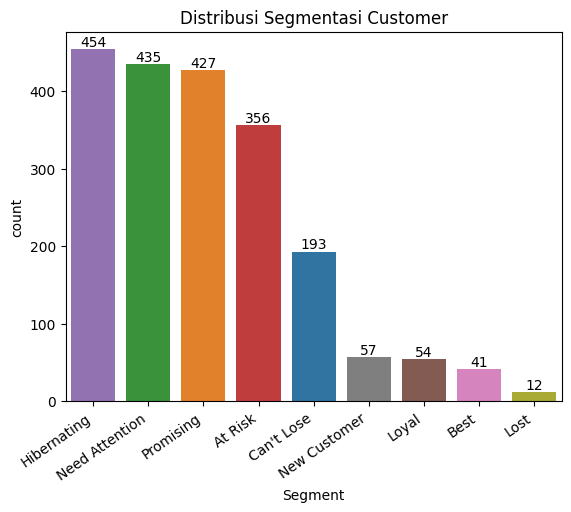

In [174]:
ax = sns.countplot(df,x="Segment", hue="Segment", order=df["Segment"].value_counts().index)
for container in ax.containers:
    ax.bar_label(container)
plt.title("Distribusi Segmentasi Customer")
plt.xticks(rotation=35,ha="right")

In [175]:
#membuat df untuk check persentase
df_perentage_Segment={"Segment":list(df["Segment"].value_counts(ascending=False).index),
                      "Percentage" : list(round(df["Segment"].value_counts(ascending=False)/len(df)*100,1).values)}
df_perentage_Segment = pd.DataFrame(df_perentage_Segment)
df_perentage_Segment

,Segment,Percentage
0,Hibernating,22.4
1,Need Attention,21.4
2,Promising,21.0
3,At Risk,17.5
4,Can't Lose,9.5
5,New Customer,2.8
6,Loyal,2.7
7,Best,2.0
8,Lost,0.6


**"Insight"** : 
- Kebanyakan customer berada di segmentasi **"Hibernating"** sebesar 22.4%, **"Need Attention"** sebesar 21.4% dan **"Promising"** 21%.

>### **Top Produk Dari Masing-Masing Segment**


In [176]:
#membuat df untuk check median
df_group_segment_prod = df.groupby(by="Segment")[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median()
df_group_segment_prod

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
Segment,,,,,,
At Risk,376.5,22.0,142.5,32.0,23.5,46.5
Best,559.0,42.0,333.0,80.0,41.0,57.0
Can't Lose,729.0,47.0,374.0,63.0,46.0,61.0
Hibernating,23.0,2.0,16.0,3.0,2.0,10.0
Lost,4.5,1.5,5.5,2.0,0.0,5.0
Loyal,750.5,22.0,240.5,48.0,32.0,52.0
Need Attention,415.0,26.0,184.0,39.0,26.0,45.0
New Customer,11.0,2.0,8.0,2.0,2.0,7.0
Promising,23.0,2.0,15.0,3.0,2.0,10.0


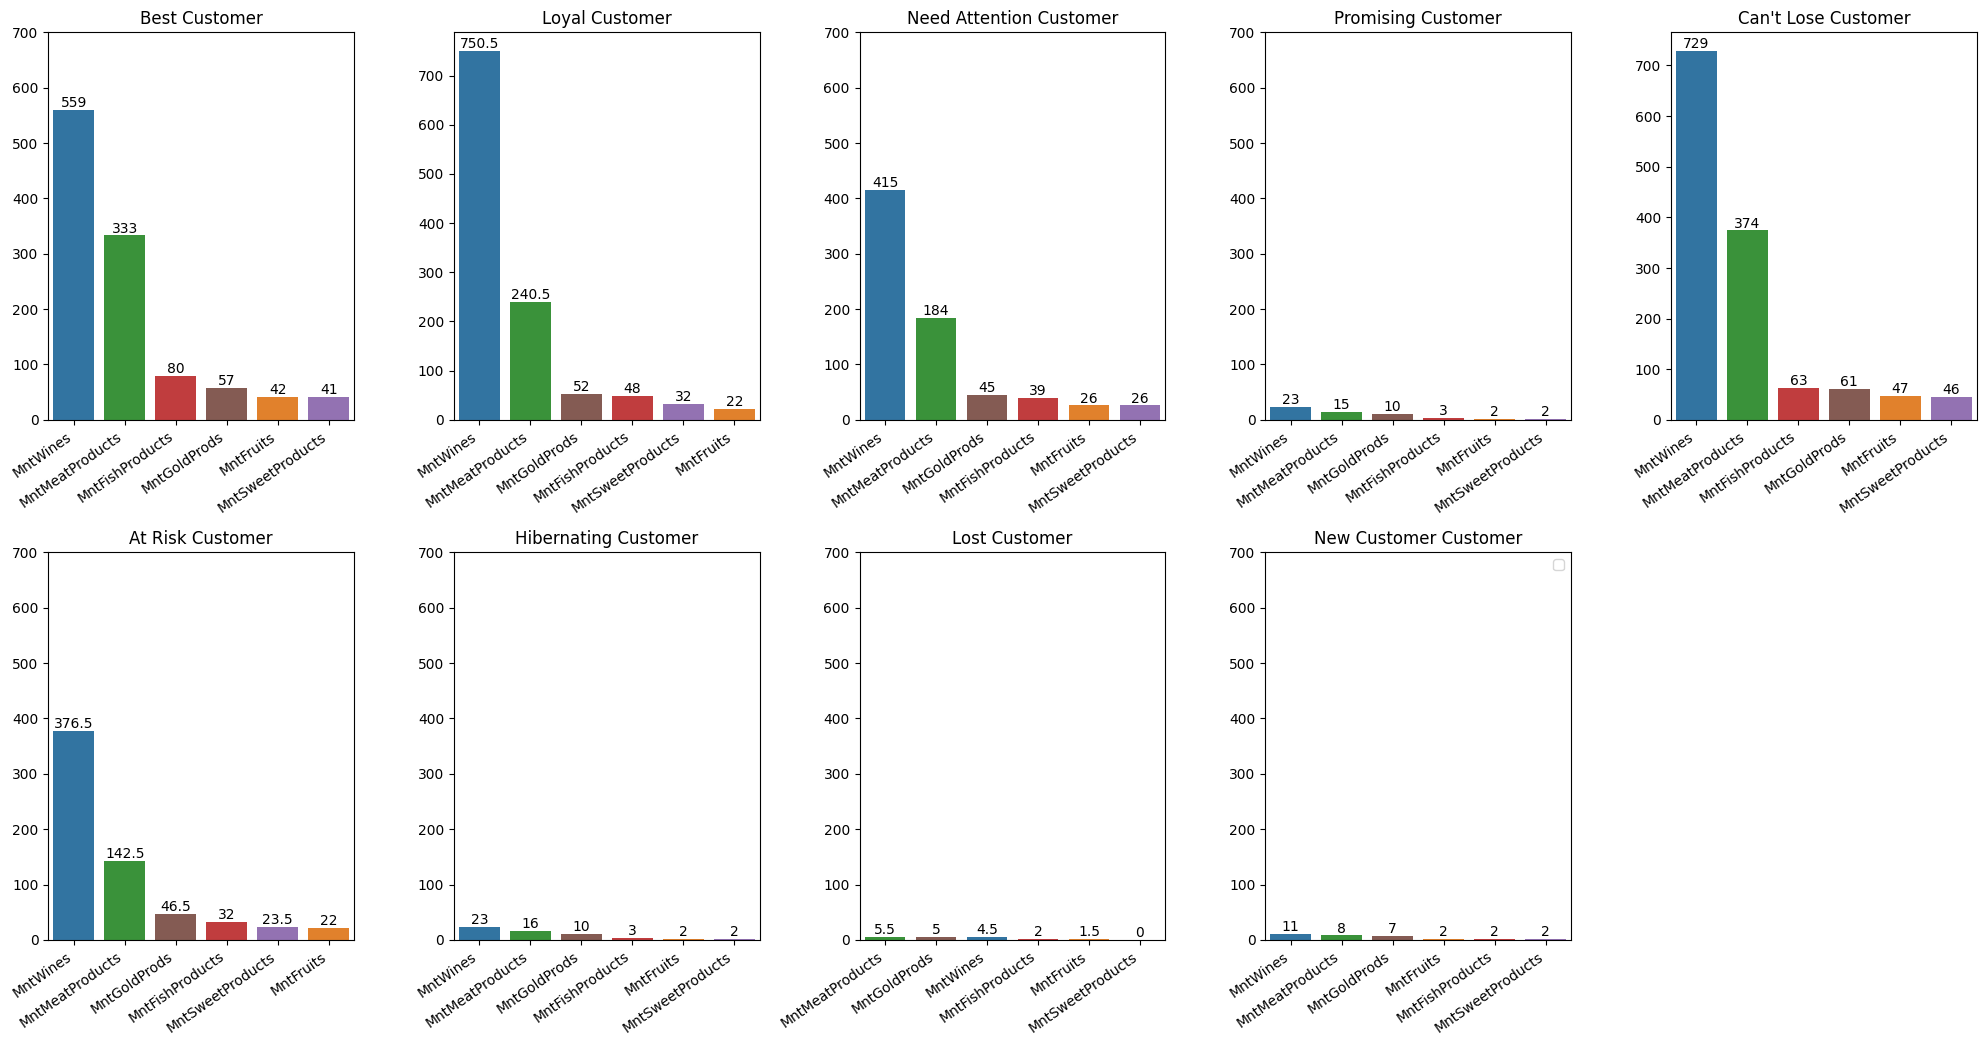

In [177]:
kolom = ['Best', 'Loyal', 'Need Attention', 'Promising', "Can't Lose",  'At Risk', 'Hibernating', 'Lost', 'New Customer']


plt.figure(figsize=(20, 20))
for i, column in enumerate(kolom):
    plt.subplot(4, 5, i + 1)
    ax = sns.barplot(df[df["Segment"]==column].groupby(by="Segment")[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median(),ci=False, order=df_group_segment_prod.loc[column].sort_values(ascending=False).index)
    plt.xticks(rotation=35,ha="right")
    plt.yticks(ticks=range(0,800,100))
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column + " Customer")

plt.legend()
plt.tight_layout()
plt.show()

- **"Best Customer"** : 
    - 1st : Wines
    - 2nd : Meat
    - 3rd : Fish

- **"Loyal Customer"** :
    - 1st : Wines
    - 2nd : Meat
    - 3rd : Gold

- **"Need Attention Customer"** :
    - 1st : Wines
    - 2nd : Meat
    - 3rd : Gold

- **"Promising Customer"** :
    - 1st : Wines
    - 2nd : Meat
    - 3rd : Gold

- **"Can't Lose Customer"** :
    - 1st : Wines
    - 2nd : Meat
    - 3rd : Fish

- **"At Risk Customer"** :
    - 1st : Wines
    - 2nd : Meat
    - 3rd : Gold

- **"Hibernating Customer"** :
    - 1st : Wines
    - 2nd : Meat
    - 3rd : Gold

- **"Lost Customer"** :
    - 1st : Gold
    - 2nd : Fish
    - 3rd : Wines

- **"New Customer"** :
    - 1st : Wines
    - 2nd : Meat
    - 3rd : Gold

**Insight :**
- Produk Wine merupakan rata-rata produk paling digemari disetiap segmen customer.
- Segmentasi **"Promising Customer"**, **""Hibernating Customer** dan **"Lost Customer"** memilik daya tarik kecil kepada prodak yang ada.

>### **Top Kampanye Dari Masing-Masing Segment**


In [178]:
#membuat df untuk check sum masing-masing kampanye
df_group_segment_cmp = df.groupby(by="Segment")[['1st Campaign', '2nd Campaign', '3rd Campaign', '4th Campaign', '5th Campaign', '6th Campaign']].sum()

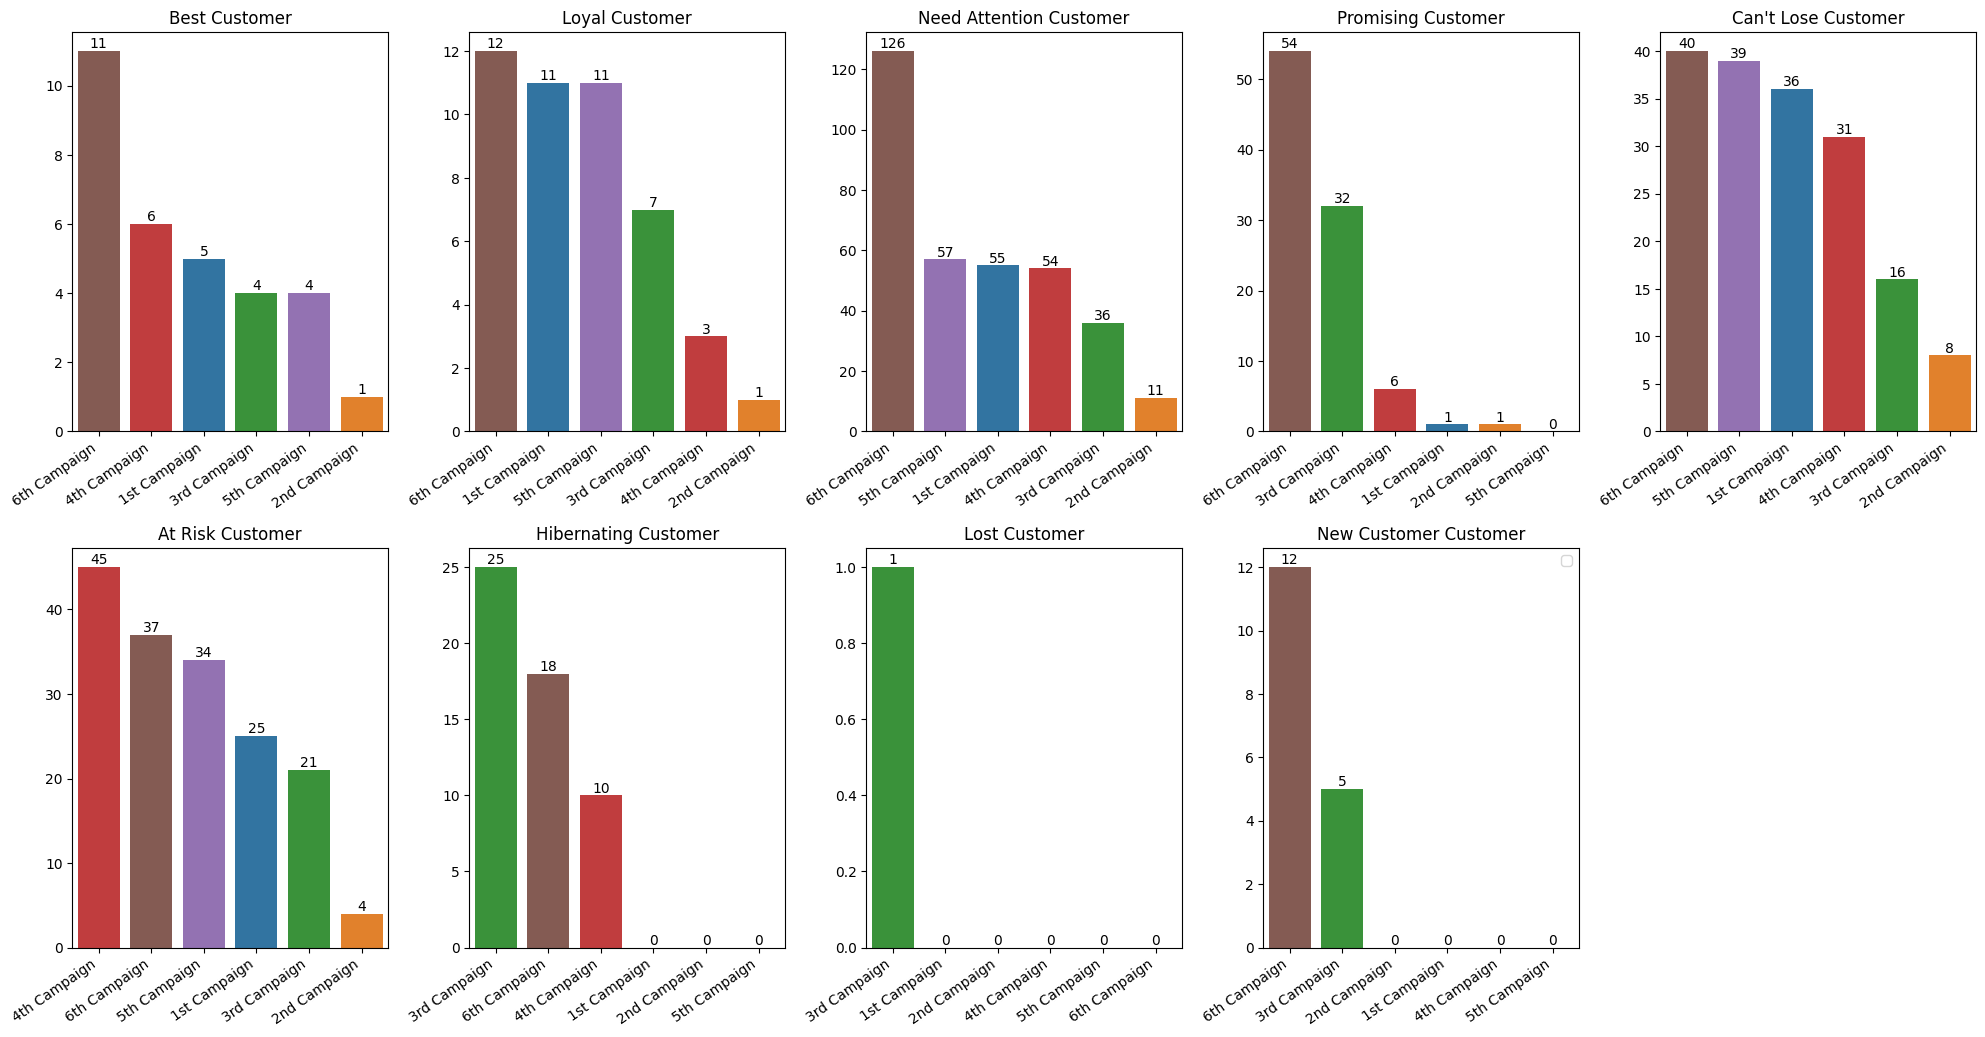

In [179]:
kolom = ['Best', 'Loyal', 'Need Attention', 'Promising', "Can't Lose",  'At Risk', 'Hibernating', 'Lost', 'New Customer']


plt.figure(figsize=(20, 20))
for i, column in enumerate(kolom):
    plt.subplot(4, 5, i + 1)
    ax = sns.barplot(df[df["Segment"]==column].groupby(by="Segment")[['1st Campaign', '2nd Campaign', '3rd Campaign', '4th Campaign', '5th Campaign', '6th Campaign']].sum(),ci=False, order=df_group_segment_cmp.loc[column].sort_values(ascending=False).index)
    plt.xticks(rotation=35,ha="right")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column + " Customer")

plt.legend()
plt.tight_layout()
plt.show()

- **"Best Customer"** : 
    - 1st : 6th Campaign
    - 2nd : 4th Campaign
    - 3rd : 1st Campaign

- **"Loyal Customer"** :
    - 1st : 6th Campaign
    - 2nd : 1st Campaign
    - 3rd : 5th Campaign

- **"Need Attention Customer"** :
    - 1st : 6th Campaign
    - 2nd : 5th Campaign
    - 3rd : 1st Campaign

- **"Promising Customer"** :
    - 1st : 6th Campaign
    - 2nd : 3rd Campaign
    - 3rd : 4th Campaign

- **"Can't Lose Customer"** :
    - 1st : 6th Campaign
    - 2nd : 5th Campaign
    - 3rd : 1st Campaign

- **"At Risk Customer"** :
    - 1st : 4th Campaign
    - 2nd : 6th Campaign
    - 3rd : 5th Campaign

- **"Hibernating Customer"** :
    - 1st : 3rd Campaign
    - 2nd : 6th Campaign
    - 3rd : 4th Campaign

- **"Lost Customer"** :
    - 1st : 3rd Campaign
    - 2nd : -
    - 3rd : -

- **"New Customer"** :
    - 1st : 6th Campaign
    - 2nd : 3rd Campaign
    - 3rd : -

**Insight :**
- Dari 3 Segmentasi terbaik, menerima kampanye ke-6 cukup banyak.
- Segmentasi Customer baru juga menerima kampanye ke-6.

>### **Top Cara Belanja Dari Masing-Masing Segment**


In [180]:
df.columns

Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Dependents',
       'Dt_Customer', 'Recency', 'RecencyScore', 'Frequency', 'FrequencyScore',
       'Monetary', 'MonetaryScore', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'Web', 'Catalog', 'Store', 'NumWebVisitsMonth',
       'Complain', '1st Campaign', '2nd Campaign', '3rd Campaign',
       '4th Campaign', '5th Campaign', '6th Campaign', 'Segment'],
      dtype='object')

In [181]:
#membuat df untuk check sum
df_group_segment_purc = df.groupby(by="Segment")[['Web', 'Catalog', 'Store']].sum()

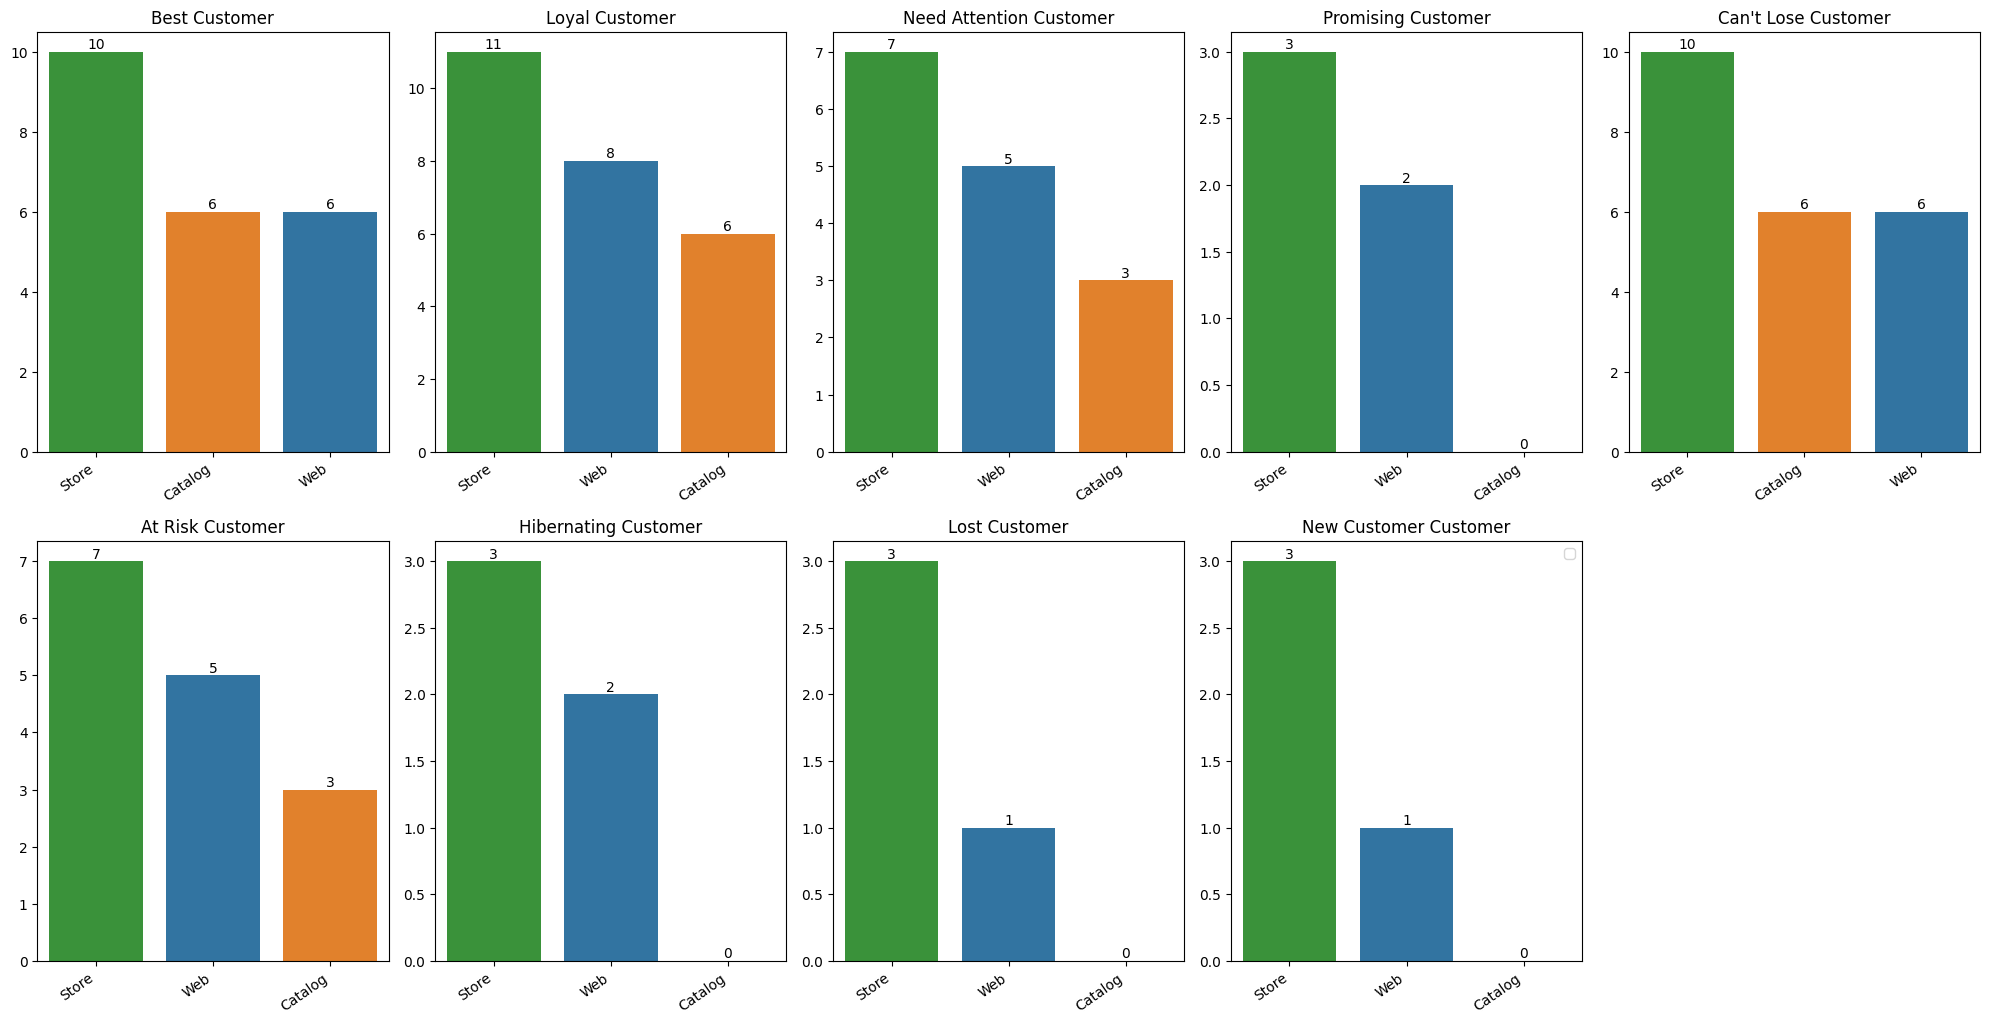

In [182]:
kolom = ['Best', 'Loyal', 'Need Attention', 'Promising', "Can't Lose",  'At Risk', 'Hibernating', 'Lost', 'New Customer']


plt.figure(figsize=(20, 20))
for i, column in enumerate(kolom):
    plt.subplot(4, 5, i + 1)
    ax = sns.barplot(df[df["Segment"]==column].groupby(by="Segment")[['Web', 'Catalog', 'Store']].median(),ci=False, order=df_group_segment_purc.loc[column].sort_values(ascending=False).index)
    plt.xticks(rotation=35,ha="right")
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(column + " Customer")

plt.legend()
plt.tight_layout()
plt.show()

- **"Best Customer"** : 
    - 1st : Store Purchase
    - 2nd : Catalog Purchase
    - 3rd : Web Purchase

- **"Loyal Customer"** :
    - 1st : Store Purchase
    - 2nd : Web Purchase
    - 2nd : Catalog Purchase

- **"Need Attention Customer"** :
    - 1st : Store Purchase
    - 2nd : Web Purchase
    - 2nd : Catalog Purchase

- **"Promising Customer"** :
    - 1st : Store Purchase
    - 2nd : Web Purchase
    - 3rd : -

- **"Can't Lose Customer"** :
    - 1st : Store Purchase
    - 2nd : Catalog Purchase
    - 3rd : Web Purchase

- **"At Risk Customer"** :
    - 1st : Store Purchase
    - 2nd : Web Purchase
    - 2nd : Catalog Purchase

- **"Hibernating Customer"** :
    - 1st : Store Purchase
    - 2nd : Web Purchase
    - 3rd : -
- **"Lost Customer"** :
    - 1st : Store Purchase
    - 2nd : Web Purchase
    - 3rd : -

- **"New Customer"** :
    - 1st : Store Purchase
    - 2nd : Web Purchase
    - 3rd : -

**Insight** : 
- Store Purchase merupakan cara transaksi yang paling digemari dari semua segmen.
- Web Purchase masih kurang digemari dari semua segmen dibandingkan dengan Store Purchase.

>### **Penerimaan Discount Masing-Masing Segment**


In [183]:
#membuat df untuk check median
df_group_segment_discount = df.groupby("Segment")[["NumDealsPurchases"]].median().sort_values(by="NumDealsPurchases", ascending=False)
df_group_segment_discount

,NumDealsPurchases
Segment,
Loyal,3.0
At Risk,2.0
Hibernating,2.0
Need Attention,2.0
Promising,2.0
Lost,1.0
Can't Lose,1.0
Best,1.0
New Customer,1.0


Text(0.5, 1.0, 'Median Menerima Discount per Segmen')

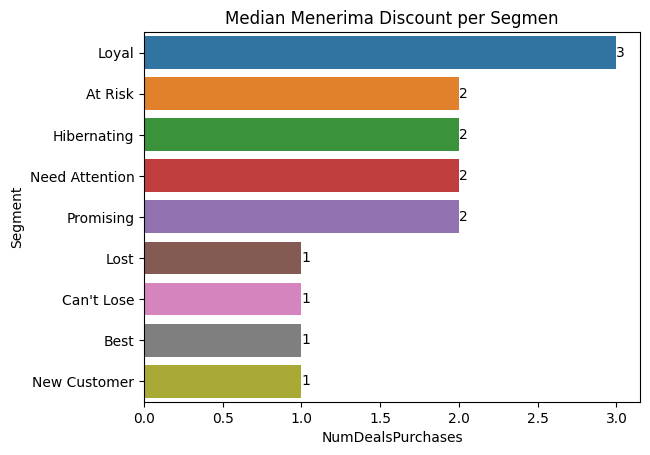

In [184]:
ax = sns.barplot(df_group_segment_discount, x="NumDealsPurchases", y="Segment", hue="Segment")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Median Menerima Discount per Segmen")

**Insight** : 
- **Loyal Customer** memiliki median menggunakan discount terbanyak.

>### **Median Income Masing-Masing Segment**


In [185]:
#membuat df untuk check median
df_group_segment_income= df.groupby("Segment")[["Income"]].median().sort_values(by="Income", ascending=False)
df_group_segment_income

,Income
Segment,
Can't Lose,72228.0
Best,71434.0
Loyal,70116.0
Need Attention,65704.0
At Risk,62813.5
Hibernating,35908.5
Promising,35178.0
New Customer,32173.0
Lost,28887.5


Text(0.5, 1.0, 'Median Income per Segmen ($)')

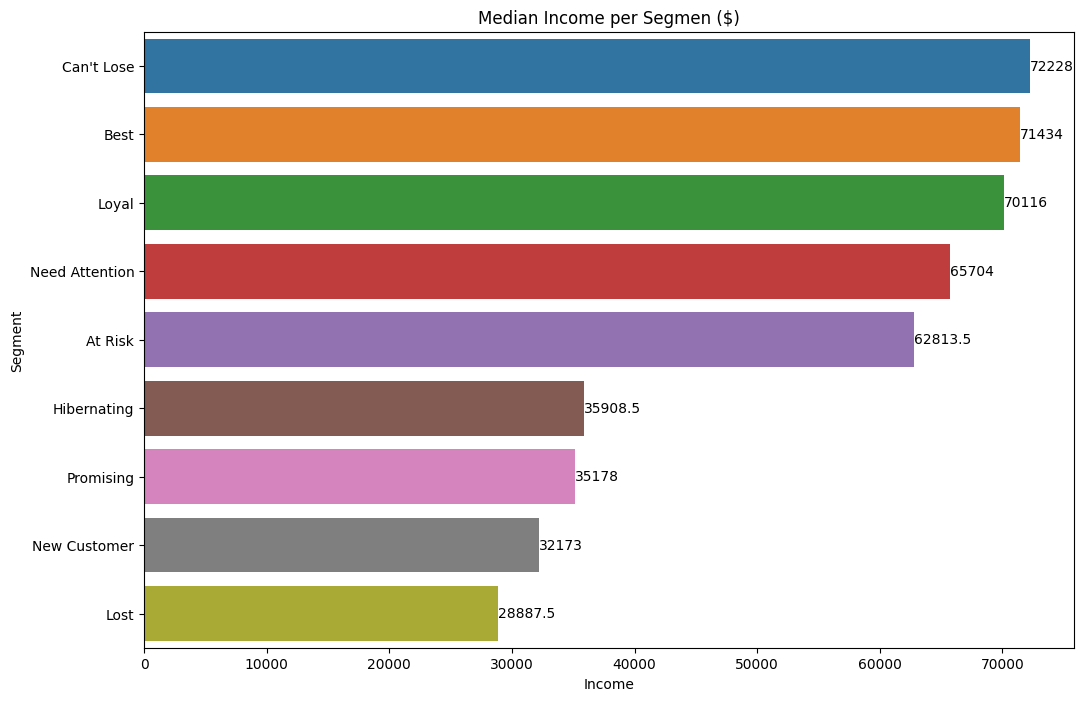

In [186]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(df_group_segment_income, x="Income", y="Segment", hue="Segment")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Median Income per Segmen ($)")

**"Insight"** : 
- **"Cant' Lose Customer"**, **"Best Customer"** dan **"Loyal Customer"** segmen dengan median income tertinggi.
- **"Lost Customer"**, **"New Customer"** dan **"Promising Customer"** segmen dengan median income terendah.

>### **Top Product (Median)**


In [187]:
df_prod_median = pd.DataFrame(df[['MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].median().sort_values(ascending=False))
df_prod_median.reset_index(inplace=True)
df_prod_median = df_prod_median.rename(columns={"index" : "kolom",
                               0:"quantity"})
df_prod_median

,kolom,quantity
0,MntWines,174.0
1,MntMeatProducts,68.0
2,MntGoldProds,24.0
3,MntFishProducts,12.0
4,MntFruits,8.0
5,MntSweetProducts,8.0


Text(0.5, 1.0, 'Top Product (Median-Customer)')

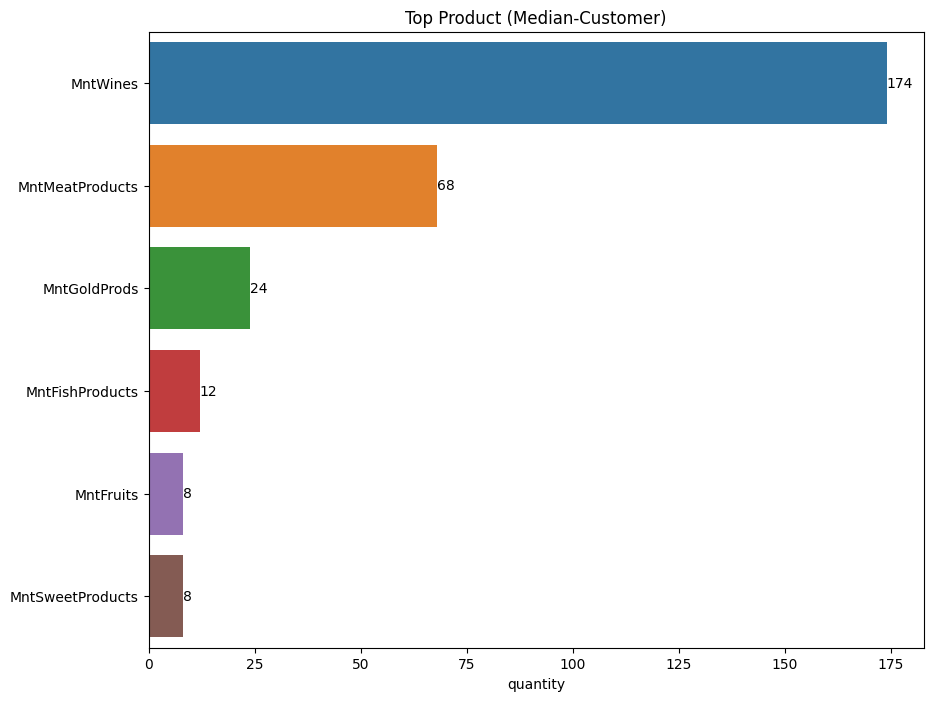

In [188]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(df_prod_median, x="quantity", y="kolom", hue="kolom")
plt.ylabel("")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top Product (Median-Customer)")

**"Insight"** :
- **"Produk Wine"** merupakan produk utama dari toko dengan nilai median dari kuantiti yang paling tinggi.
- **"Produk Manisan"**, **"Produk Buah"** dan **"Produk Ikan"** merupakan produk yang kurang laku.

>### **Top Kampanye**


In [189]:
df_camp_sum = pd.DataFrame(df[['1st Campaign', '2nd Campaign', '3rd Campaign', '4th Campaign', '5th Campaign', '6th Campaign']].sum().sort_values(ascending=False))
df_camp_sum.reset_index(inplace=True)
df_camp_sum = df_camp_sum.rename(columns={"index" : "kolom",
                               0:"total"})
df_camp_sum

,kolom,total
0,6th Campaign,310
1,4th Campaign,155
2,3rd Campaign,147
3,5th Campaign,145
4,1st Campaign,133
5,2nd Campaign,26


Text(0.5, 1.0, 'Top Kampanye')

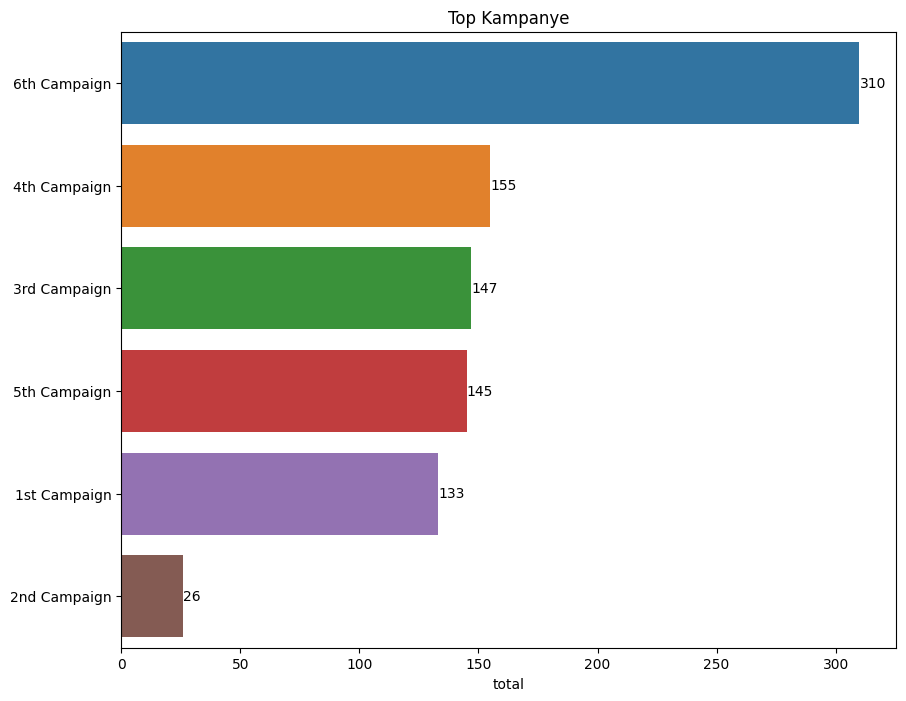

In [190]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(df_camp_sum, x="total", y="kolom", hue="kolom")
plt.ylabel("")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top Kampanye")

**"Insight"** :
- Dari kesulurah customer pun **"kampanye ke-6"** paling digemari.

>### **Top Cara Belanja (Median)**


In [191]:
df.columns

Index(['ID', 'Age', 'Education', 'Marital_Status', 'Income', 'Dependents',
       'Dt_Customer', 'Recency', 'RecencyScore', 'Frequency', 'FrequencyScore',
       'Monetary', 'MonetaryScore', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'Web', 'Catalog', 'Store', 'NumWebVisitsMonth',
       'Complain', '1st Campaign', '2nd Campaign', '3rd Campaign',
       '4th Campaign', '5th Campaign', '6th Campaign', 'Segment'],
      dtype='object')

In [192]:
df_transc_median = pd.DataFrame(df[['Web', 'Catalog', 'Store']].median().sort_values(ascending=False))
df_transc_median.reset_index(inplace=True)
df_transc_median = df_transc_median.rename(columns={"index" : "kolom",
                               0:"total"})
df_transc_median

,kolom,total
0,Store,5.0
1,Web,4.0
2,Catalog,2.0


Text(0.5, 1.0, 'Top Market')

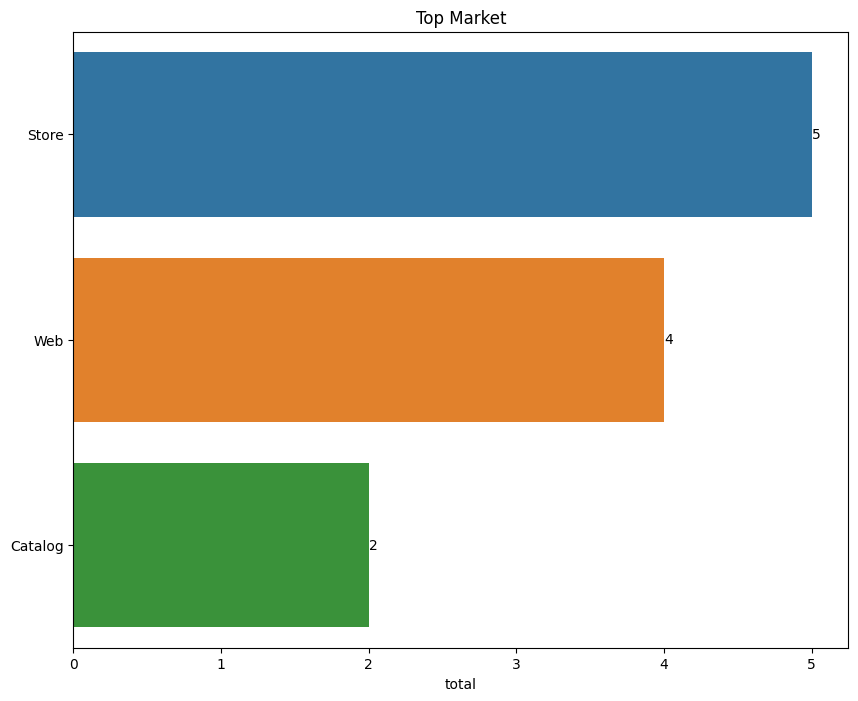

In [193]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(df_transc_median, x="total", y="kolom", hue="kolom")
plt.ylabel("")
for container in ax.containers:
    ax.bar_label(container)
plt.title("Top Market")

**"Insight"** :
- Dari kesulurah customer pun **"Transaksi pada toko"** paling digemari.
- **"Catalog"** peringkat paling bawah karena kurang digemari.

---

## **Summary**

## **Kesimpulan dan Rekomendasi Masing-Masing Segmen**

- **"Best Customer"** : 
    Merupakan customer yang memiliki score RFM sempurna (R=5, F=4-5, M=4-5). Kita bisa memberikan reward khusus kepada customer ini seperti diskon bundel untuk produk yang memiliki daya tarik rendah, contohnya seperti Wine dan buah ataupun daging dan emas edible agar customer lebih mengenal produk lainnya, lalu kita juga harus lebih memperhatikan masukan ataupun komplain, dan kita juga bisa memberi tahu jika ada produk baru ke best customer terlebih dahulu ke best customer.

- **"Loyal Customer"** :
    Merupakan customer dengan nilai RFM yang baik tetapi sudah lumayan lama tidak melakukan transaksi (R=3-4, F=4-5, M=4-5). Kita bisa menambahkan produk-produk baru sesuai dengan yang disukai oleh Loyal Customer  yaitu wine dan meat. Tentunya ulasan dan complain dari mereka sangat penting. Termasuk mengenai pengguna transaksi di web karena bisa dilihat divisusalisasi diatas, Loyal customer cukup banyak menggunakan transaksi web yang bisa dilihat penggunaanya masih cukup rendah di segmen lain. 

- **"Need Attention Customer"** :
    Merupakan customer yang sudah lumayan lama tidak melakukan transaksi ataupun sering, tetapi memliki total pengeluaran atau frekuensi belanja yang baik (R=3-5, F=0-3, M=3-5 / R=3-5, F=3-5, M=0-3). Perlu perhatian lebih pada Need Attention Customer karena sangat banyak customer yang berada di segmen ini sebesar 21.4%, dan mereka berpeluang menjadi Loyal Customer. Tentunya perlu ada kampanye-kampanye baru yang terinspirasi dari kampanye ke-6, karena bisa dilihat kamapanye ke-6 merupakan kampanye yang paling digemari dari semua segemen, termasuk Best Customer dan Loyal Customer, agar dapat meningkatkan total pengeluaran atau frekuensi belanja dari Need Attention Customer. Discount yang menarik juga bagus untuk meningkat ketertarikan Need Attention Customer kepada barang-barang yang ada, karena bisa dilihat dari visualisasi penerimaan discount segmen Loyal Customer memiliki median transaksi menerima discount, yang bisa juga diterapkan kepada Need Atenttion Customer yang berpotensi menjadi Loyal Customer.

- **"Promising Customer"** :
    Merupakan customer yang baru-baru melakukan transaksi dengan jumlah transaksi dan pengeluaran yang sedikit (R=5, F=0-3, M=0-3). Perlu perhatian lebih pada Promising Customer karena sangat banyak customer berada disegmen ini sebesar 21%. Tentunya promo-promo menarik sangat dibutuhkan untuk Promising Customer dilihat dari median income Proming Customer yang rendah sekitar $35178. Kita bisa menggunakan strategi bandling kepada meraka. Tentunya kita merekomendasikan atau menyarankan produk yang paling laku, agar customer ini tergugah. Dan bisa dilihat juga hampir seleuruh Promising Customer tidak perna melakukan pembelanjaan menggunakan catalog, perlunya ditingkatkan pembuat cataglog dengan design yang lebih menarik. Dengan nilai Recency yang baik, bonus point belanja akan sangat baik, untuk meningkatkan frekuensi dan total pengeluaran belanja.

- **"Can't Lose Customer"** :
    Merupakan customer yang memiliki jumlah pengeluaran dan jumlah transaksi yang baik, tetapi sudah lama tidak melakukan transaksi (R=0-2, F=3-5, M=3-5). Kita perlu dengarkan masukan dari mereka, memungkinkan customer ini ada ketertarikan kepada kompetitor lain, karena bisa dilihat dari score Frequency dan Monetary yang sangat baik, membuktikan ada keterikatan pada produk yang ada, tetapi mereka sudah lama tidak melakukan transaksi. Perlu adanya program loyalty seperti point-point, yang menarik untuk customer di segmen ini. Lalu melakukan email marketing juga sangat disarankan, untuk kembali menggugah mereka menggunakan kampanye-kampanye baru yang terinspirasi dari kampanye ke-6.

- **"At Risk Customer"** :
    Customer yang sudah lama tidak melakukan transaksi dengan total pengeluaran rata-rata (R=0-2, F=0-3, M=3-5 / R=0-2, F=3-5, M=0-3). Segmen ini menyukai produk kita tetapi sangat penting juga untuk mereka penawaran harga yang baik karena mereka akan mencari harga termurah dimarket, karena bisa kita lihat berbeda dari segment lainya, segmen At Risk Customer lebih tertarik pada kampanye ke-4, yang memungkinkan pada saat itu kampanye ke-4 memiliki penawaran harga yang paling menarik segmen ini. Meningkatkan kualitas produk dan inovasi produk akan sangat baik, supaya saat ada kampanye-kampanye baru nantinya yang menawarkan harga yang menggugah segmen At Risk Customer, rasa mereka untuk membeli lagi kedepannya akan meningkat juga karena sudah mulai ada rasa kepercayaan dan puas akan produk-produk yang dimiliki. Perlunya juga dilakukan email marketing untuk segmen ini.

- **"Hibernating Customer"** :
    Customer yang sudah lama tidak melakukan transaksi dengan total pengeluaran dan transaksi hanya sedikit (R=0-2, F=0-3, M=0-3). Perlu perhatian lebih pada Hibernating Customer karena sangat banyak customer berada disegmen ini sebesar 22.4%. Memungkinkan adanya kurang ketertarikan segmen ini pada produk yang ada. Tentunya peningkatan kualitas dan inovasi dari produk akan sangat dibutuhkan. Melakukan email marketing dengan penawaran yang personal dari masing-masing customer juga akan sangat bagus, agar mereka kembali tergugah.

- **"Lost Customer"** :
    Customer dengan Score Buruk (R=0, F=0, M=0). Customer pada segmen ini menunjukan ketidak tertarikan pada produk yang ada ataupun bukan customer yang memiliki keterikatan kepada jenis produk yang kita jual terlihat dari income yang sangat rendah diangka $28887.5. Dengan mengadakan kampanye-kampanye baru akan sangat penting untuk menunjukan kehadiran kita.

- **"New Customer"** :
    Customer yang baru melakukan transaksi dengan total transaksi masih sedikit (R=5, F=0-1, M=0-3). Membangun kepercayaan sangat penting bagi New Customer, sediakan bantuan saat dibutuhkan, dan penawaran ekslusif untuk meningkatkan loyalitas mereka.

## **Kesimpulan dan Rekomendasi Masing-Masing Produk**

- **"Produk Wine"** : 
    Produk Wine merupakan produk favorit dengan nilai median kuatiti 174. Terus tingkatkan kualitas dan inovasi. Produk baru dari wine pasti sangat di tunggu-tunggu, adakan acara untuk mencicipi produk baru kepada segmen Best Customer dan Loyal Customer untuk menerima masukkan dari mereka.

- **"Produk Daging"** :
    Merupakan produk yang paling laku ke-2 dengan nilai median kuantiti 68. Tingkatkan popularitas produk dengan mengadakan kampanye-kampanye mengenai produk. Peningkatan penjualan bisa dilakukan dengan melakukan promosi bundle dengan produk terlaris yaitu wine. Perbanyak variasi daging untuk meningkatkan daya tarik customer.

- **"Produk Emas Edible"** :
    Produk berada diposisi ke-3 dengan dengan nilai median kuantiti 24. Mungkin untuk beberapa customer masih asing menggunakan Emas Edible untuk hiasan pada masakan dan lainnya. Adakan kampanye-kampanye dan edukasi berupa eksibisi atau peragaan, pada penggunaan emas edible untuk menjadi hiasan pada masakan. Sehingga menumbuhkan daya tari customer untuk membeli. Dan pembelian Emas Edible bisa dibundle dengan pembelian daging untuk menjadi hiasan pada masakan.

- **"Produk Ikan"** :
    Produk dengan nilai pembelian yang sedikit dengan nilai median kuantiti 12 dari seluruh customer. Mungkin bagi beberapa customer lebih mudah untuk memasak daging dibandingkan ikan. Mungkin bisa kita gabungkan pembelian Produk ikan dengan resep cara memasak ikan yang mudah. Perlu juga adanya kampanye-kampanye dan edukasi berupa eksibisi memamsak ikan yang dilakukan oleh chef supaya customer lebih tertarik lagi dengan produk ikan dan menaikkan popularitas. Perlunya juga meningkatkan kualitas, untuk bisa melawan kompetitor penjual ikan lainnya.

- **"Produk Buah"** :
    Merupakan produk yang kurang laku dengan nilai median kuantiti 8 dari seluruh customer. Dengan mengadakan edukasi tentang beneifit dari memakan buah akan membantu menaikan ketertarikan customer pada produk. Kita juga bisa membuat bundle resep makanan ataupun minuman dengan wine, daging dan ikan untuk menaikkan penjualan dari produk buah.

- **"Produk Manisan"** :
    Sama dengan produk buah, manisan juga memiliki nilai median kuantiti 8 dari seluruh customer. Bundle product manisan dengan produk yang populer seperti wine sangat membantu popularitas produk manisan. Mungkin juga bisa diadakan promosi-promosi pada produk manisan saat ada hari raya ataupun hari besar lainnya untuk mengenalkan dan meningkatkan popularitas produk.

## **Kesimpulan dan Rekomendasi Lain-Lain**

- **"Campaign"** : Kampanye ke-6 merupakaan kampanye yang paling diterima dari setiap segmen. Pembuat kampanye-kampanye barikutnya bisa terisnprirasi dari kampanye ke-6 dengan ditambahi dengan edukasi ataupun eksibisi untuk produk-produk yang masih kurang populer. Perlunya detail penjelasan tentang masing-masing kampanye untuk membantu penganalisisan

- **"Web Purchases"** : Penggunaan Web Store disetiap segmen, bisa dibilang masih cenderung lebih sedikit dibanding pembelian distore. Hal tersebut bisa dikembangkan dengan cara melakukan promosi secara berkala seperti diskon dll, sehingga membangun antusias pelanggan untuk menggunakan Web Store. Karena dengan adanya Web Store ikut serta mambangun Brand Awareness sehingga bisa membuka pasar yang lebih luas lagi.

-**"Catalog Purchases"** : Penggunaan catalog untuk melakukan transaksi masih sangat kurang diminati. Selain catalog sangat berguna untuk segmen-segmen customer yang mengharapkan harga special, catalog juga meningkatkan product awareness agar produk semakin dikenal. Perlu ditingkatkan dari segi design dan promo agar customer semakin tergugah.

---

## **Save CSV untuk Tableau**

In [194]:
df.to_csv('Supermarket Customers - Clean.csv', index=False)